In [10]:
import pandas as pd
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import matplotlib.pyplot as plt

In [5]:
sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=3,
)

client=Client(
    transport=sample_transport
)

query= gql('''
query{
    pairs{
      token0{
        name
        symbol
    }
      token1{
        name
        symbol
    }
      id
      createdAtTimestamp
      token0Price
      token1Price
      volumeUSD
      reserveETH
      reserveUSD
      
      
    }
    
}''')
response=client.execute(query)

In [7]:
pairs=[]
for i in response['pairs']:
    pairs.append([
        i['token0']['name'],
        i['token0']['symbol'],
        i['token1']['name'],
        i['token1']['symbol'],
        i['id'],
        i['createdAtTimestamp'],
        i['token0Price'],
        i['token1Price'],
        i['volumeUSD'],
        i['reserveETH'],
        i['reserveUSD']
        
    ])

df=pd.DataFrame(pairs)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Solution Life Coin,SLC,Tether USD,USDT,0x00004ee988665cdda9a1080d5792cecd16dc1220,1610801924,4.928335888449350007658500420952246,0.2029082478618639106177128627761995,0,0.06180964849520752719762027449979838,81.00572993301350481265154215168061
1,HARDCORE,HORE,Wrapped Ether,WETH,0x0000871c95bb027c90089f4926fd1ba82cdd9a8b,1601773155,50.74468085106382978723404255319149,0.01970649895178197064989517819706499,0,0.000000000000000282,0.00000000000009764515173366604499968328796917891
2,SoMee.Social,SOMEE,Wrapped Ether,WETH,0x00030110a7053083a7a160449a0e8f1adce9438d,1623578174,44814.51523003095002692816647635578,0.0000223141987560736440202617597706307,0,53.31341394595572667,103044.4852316292436148213945208652
3,DATO Curve x,DATCx,Wrapped Ether,WETH,0x00031554ee74e4a6d497677e5152d94c3dbe5f46,1598295483,0.0000000001127157277878947277330133840128107,8871876353.243016355478361557388913,0,0.000367774762347336,0.1469467966437433309224845826987036
4,WGRT,WGRT,Wrapped Ether,WETH,0x0003713f74bc8c3435f4499eb0cbc6298cd1529d,1623732978,739214379,0.00000000135278753824132525430758700109106,0,0.000000000000000001,0.00000000000000258591312250912515094669330405...


In [9]:
df.columns=['Token1','Symbol1','Token2','Symbol2','Pool Id','Timestamp','Base Currency Quantity Traded','Quote Currency Quantity Traded','Volume_USD','Total liquidity in pair stored as an amount of ETH','Total liquidity in pair stored as an amount of USD']
df.head()

,Token1,Symbol1,Token2,Symbol2,Pool Id,Timestamp,Base Currency Quantity Traded,Quote Currency Quantity Traded,Volume_USD,Total liquidity in pair stored as an amount of ETH,Total liquidity in pair stored as an amount of USD
0,Solution Life Coin,SLC,Tether USD,USDT,0x00004ee988665cdda9a1080d5792cecd16dc1220,1610801924,4.928335888449350007658500420952246,0.2029082478618639106177128627761995,0,0.06180964849520752719762027449979838,81.00572993301350481265154215168061
1,HARDCORE,HORE,Wrapped Ether,WETH,0x0000871c95bb027c90089f4926fd1ba82cdd9a8b,1601773155,50.74468085106382978723404255319149,0.01970649895178197064989517819706499,0,0.000000000000000282,0.00000000000009764515173366604499968328796917891
2,SoMee.Social,SOMEE,Wrapped Ether,WETH,0x00030110a7053083a7a160449a0e8f1adce9438d,1623578174,44814.51523003095002692816647635578,0.0000223141987560736440202617597706307,0,53.31341394595572667,103044.4852316292436148213945208652
3,DATO Curve x,DATCx,Wrapped Ether,WETH,0x00031554ee74e4a6d497677e5152d94c3dbe5f46,1598295483,0.0000000001127157277878947277330133840128107,8871876353.243016355478361557388913,0,0.000367774762347336,0.1469467966437433309224845826987036
4,WGRT,WGRT,Wrapped Ether,WETH,0x0003713f74bc8c3435f4499eb0cbc6298cd1529d,1623732978,739214379,0.00000000135278753824132525430758700109106,0,0.000000000000000001,0.00000000000000258591312250912515094669330405...


In [13]:
Max_Volume_USD=df['Volume_USD'].max()
df[df['Volume_USD']==Max_Volume_USD]

,Token1,Symbol1,Token2,Symbol2,Pool Id,Timestamp,Base Currency Quantity Traded,Quote Currency Quantity Traded,Volume_USD,Total liquidity in pair stored as an amount of ETH,Total liquidity in pair stored as an amount of USD
14,Wrapped Ether,WETH,Ispolink Token,ISP,0x000dd0b1528a396c6ea2e09796a7b4a534e9e37b,1620670824,0.0000005643059960509233988026404251213792,1772088.205686475189585566852525229,9964.208583150702679819404014744441,51.569905181041225174,101185.0213162187770852559511812982


**So, The maximum Volume in USD is for WETH-ISP pair**

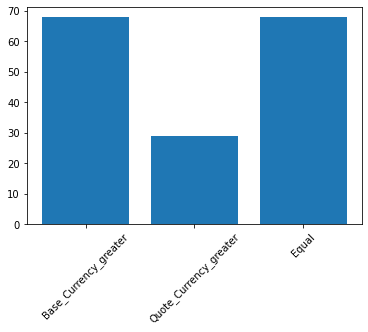

In [26]:
df['Base Currency Quantity Traded']=df['Base Currency Quantity Traded'].astype(float)
df['Quote Currency Quantity Traded']=df['Quote Currency Quantity Traded'].astype(float)

Base_Currency_greater=df[(df['Base Currency Quantity Traded']-df['Quote Currency Quantity Traded'])>0]['Quote Currency Quantity Traded'].count()
Quote_Currency_greater=df[(df['Base Currency Quantity Traded']-df['Quote Currency Quantity Traded'])<0]['Quote Currency Quantity Traded'].count()
Equal=df[(df['Base Currency Quantity Traded']-df['Quote Currency Quantity Traded'])>0]['Quote Currency Quantity Traded'].count()

data={'Base_Currency_greater':Base_Currency_greater,'Quote_Currency_greater':Quote_Currency_greater,'Equal':Equal}
x=list(data.keys())
y=list(data.values())

plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

**So, for most pairs,Qoute Currency quantity traded is greater than or equal to Base Currency quantity traded**